In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
url = "https://raw.githubusercontent.com/HipsterVizNinja/random-data/main/Music/hot-100/Hot%20100.csv"
raw_df = pd.read_csv(url)

In [3]:
import datetime as dt

series = raw_df['chart_date']
raw_df['chart_date'] = pd.to_datetime(series)

raw_df['month'] = raw_df['chart_date'].dt.month
raw_df['year'] = raw_df['chart_date'].dt.year

<AxesSubplot:xlabel='year', ylabel='Count'>

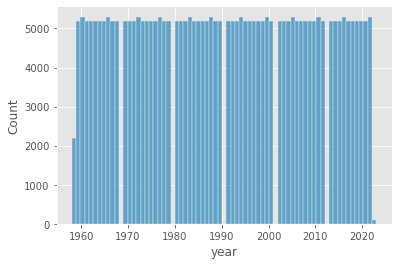

In [4]:
sns.histplot(data = raw_df, x = 'year')

In [5]:
n_unique_songs = pd.DataFrame(raw_df.groupby('year')['song_id'].nunique())

In [6]:
n_unique_songs.reset_index(inplace=True)

In [7]:
n_unique_songs

,year,song_id
0,1958,352
1,1959,663
2,1960,700
3,1961,779
4,1962,768
...,...,...
61,2019,633
62,2020,804
63,2021,782
64,2022,767


In [8]:
n_unique_songs.to_excel("n_unique_songs.xlsx") 

<AxesSubplot:xlabel='year', ylabel='song_id'>

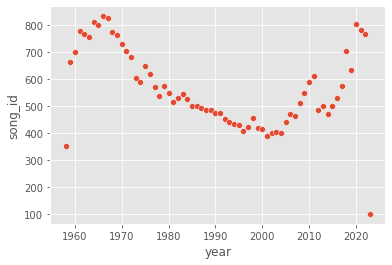

In [9]:
sns.scatterplot(data = n_unique_songs, x = 'year' , y='song_id')

<AxesSubplot:xlabel='year', ylabel='performer'>

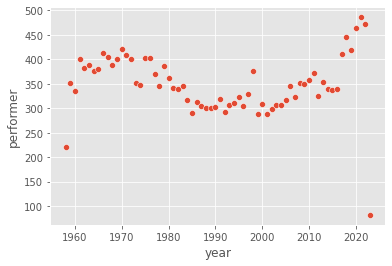

In [10]:
n_unique_artists = pd.DataFrame(raw_df.groupby('year')['performer'].nunique())
n_unique_artists.reset_index(inplace=True)
sns.scatterplot(data = n_unique_artists, x = 'year' , y='performer')

In [11]:
n_unique_artists.to_excel("n_unique_artists.xlsx") 

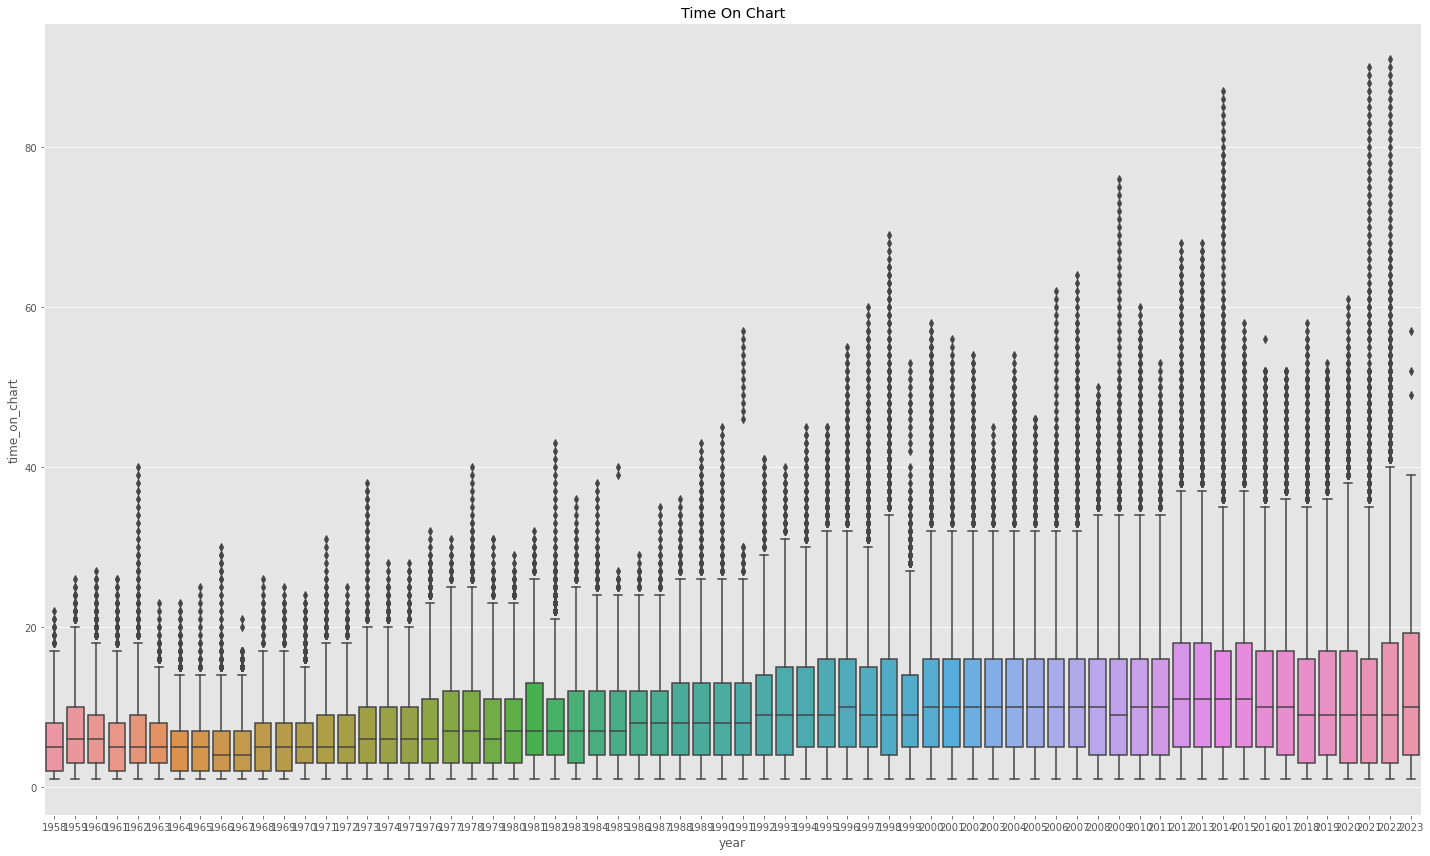

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(20, 12))
sns.boxplot(data= raw_df, x = 'year', y = 'time_on_chart')
axs.set_title('Time On Chart')
plt.tight_layout()
plt.show()

In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336295 entries, 0 to 336294
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   chart_position     336295 non-null  int64         
 1   chart_date         336295 non-null  datetime64[ns]
 2   song               336295 non-null  object        
 3   performer          336295 non-null  object        
 4   song_id            336295 non-null  object        
 5   instance           336295 non-null  float64       
 6   time_on_chart      336295 non-null  int64         
 7   consecutive_weeks  302987 non-null  float64       
 8   previous_week      302987 non-null  float64       
 9   peak_position      336295 non-null  int64         
 10  worst_position     336295 non-null  int64         
 11  chart_debut        336295 non-null  object        
 12  chart_url          336295 non-null  object        
 13  month              336295 non-null  int64   

In [15]:
df_exceptions = pd.read_csv("./data/exceptions.csv")
df_sentiment = pd.read_csv("./data/sentiment_results.csv")

In [16]:
df_exceptions.drop(columns=["Unnamed: 0"], inplace = True, axis=1)

In [17]:
df_sentiment.drop(columns=["Unnamed: 0"], inplace = True, axis=1)

In [18]:
df_sentiment.rename(columns={"index":'song_id'}, inplace=True)

In [19]:
df_sentiment.head()

,song_id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,#9 DreamJohn Lennon,0.012,0.893,0.095,0.9124,0.070511,0.698499,0.230990
1,#BeautifulMariah Carey Featuring Miguel,0.063,0.581,0.356,0.9988,0.276029,0.366153,0.357818
2,#SELFIEThe Chainsmokers,0.105,0.804,0.092,-0.6048,0.555181,0.385891,0.058927
3,'65 Love AffairPaul Davis,0.091,0.633,0.275,0.9975,0.114197,0.600194,0.285609
4,'Til Summer Comes AroundKeith Urban,0.064,0.814,0.121,0.9741,0.119455,0.573680,0.306866


In [20]:
df = pd.read_csv("./data/nltk_lyric_sentiment.csv")

In [21]:
df.drop(columns=["Unnamed: 0"], inplace = True, axis=1)

In [22]:
df.head()

,song_id,neg,neu,pos,compound,chart_position,chart_date,song,performer,time_on_chart,consecutive_weeks,worst_position,chart_debut,lyrics,lyrics_clean,text_tokenized,num_lyrics
0,"""B"" GirlsYoung And Restless",0.017,0.918,0.065,0.9706,91,1990-08-11,"""B"" Girls",Young And Restless,15,14.0,91,1990-05-05,“B” Girls LyricsIntro\nHey Slim Come here chec...,“B” Girls LyricsIntro\nHey Slim Come here chec...,"['“b”', 'girls', 'lyricsintro', 'hey', 'slim',...",551
1,"""Joy"" Pt. IIsaac Hayes",0.113,0.776,0.110,-0.2103,72,1974-02-16,"""Joy"" Pt. I",Isaac Hayes,9,8.0,72,1973-12-22,1212 Songs LyricsAAlex Turner Stuck on the Pu...,1212 Songs LyricsAAlex Turner Stuck on the Pu...,"['1212', 'songs', 'lyricsaalex', 'turner', 'st...",857
2,#1 Dee JayGoody Goody,0.024,0.929,0.048,0.8957,99,1978-12-16,#1 Dee Jay,Goody Goody,5,4.0,99,1978-11-18,Lbo3d l’akhar LyricsVerse 1 Omar Cravate\n\nBa...,Lbo3d l’akhar LyricsVerse 1 Omar Cravate\n\nBa...,"['lbo3d', 'l’akhar', 'lyricsverse', '1', 'omar...",577
3,#1Nelly,0.114,0.759,0.127,-0.1135,75,2002-03-02,#1,Nelly,20,19.0,75,2001-10-20,1 LyricsIntro\nUh uh uh\nI just gotta bring it...,1 LyricsIntro\nUh uh uh\nI just gotta bring it...,"['1', 'lyricsintro', 'uh', 'uh', 'uh', 'i', 'j...",723
4,#9 DreamJohn Lennon,0.012,0.893,0.095,0.9124,68,1975-03-08,#9 Dream,John Lennon,12,11.0,68,1974-12-21,9 Dream LyricsVerse 1\nSo long ago\nWas it in ...,9 Dream LyricsVerse 1\nSo long ago\nWas it in ...,"['9', 'dream', 'lyricsverse', '1', 'so', 'long...",206


In [23]:
df.drop(columns=['neg', 'neu', 'pos', 'compound', 'lyrics_clean', 'text_tokenized'], axis=1, inplace=True)

In [24]:
print(df.shape)
print(df_sentiment.shape)


(26051, 11)
(17373, 8)


In [25]:
df_total = df_sentiment.merge(df, right_on = 'song_id', left_on= 'song_id') 
df_total.head()

,song_id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,chart_position,chart_date,song,performer,time_on_chart,consecutive_weeks,worst_position,chart_debut,lyrics,num_lyrics
0,#9 DreamJohn Lennon,0.012,0.893,0.095,0.9124,0.070511,0.698499,0.230990,68,1975-03-08,#9 Dream,John Lennon,12,11.0,68,1974-12-21,9 Dream LyricsVerse 1\nSo long ago\nWas it in ...,206
1,#BeautifulMariah Carey Featuring Miguel,0.063,0.581,0.356,0.9988,0.276029,0.366153,0.357818,95,2013-09-07,#Beautiful,Mariah Carey Featuring Miguel,16,15.0,95,2013-05-25,Beautiful LyricsIntro Mariah Carey\nAh ah you’...,292
2,#SELFIEThe Chainsmokers,0.105,0.804,0.092,-0.6048,0.555181,0.385891,0.058927,95,2014-05-24,#SELFIE,The Chainsmokers,11,10.0,95,2014-03-15,TranslationsPortuguêsEnglishSELFIE LyricsVerse...,365
3,'65 Love AffairPaul Davis,0.091,0.633,0.275,0.9975,0.114197,0.600194,0.285609,100,1982-07-10,'65 Love Affair,Paul Davis,20,19.0,100,1982-02-27,’65 Love Affair LyricsI was a car hop\nYou wer...,319
4,'Til Summer Comes AroundKeith Urban,0.064,0.814,0.121,0.9741,0.119455,0.573680,0.306866,94,2010-05-15,'Til Summer Comes Around,Keith Urban,16,15.0,94,2010-01-30,’Til Summer Comes Around LyricsInstrumental\n\...,307


In [26]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17373 entries, 0 to 17372
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   song_id            17373 non-null  object 
 1   vader_neg          17373 non-null  float64
 2   vader_neu          17373 non-null  float64
 3   vader_pos          17373 non-null  float64
 4   vader_compound     17373 non-null  float64
 5   roberta_neg        17373 non-null  float64
 6   roberta_neu        17373 non-null  float64
 7   roberta_pos        17373 non-null  float64
 8   chart_position     17373 non-null  int64  
 9   chart_date         17373 non-null  object 
 10  song               17373 non-null  object 
 11  performer          17373 non-null  object 
 12  time_on_chart      17373 non-null  int64  
 13  consecutive_weeks  16218 non-null  float64
 14  worst_position     17373 non-null  int64  
 15  chart_debut        17373 non-null  object 
 16  lyrics             173

In [27]:
df_total.columns

Index(['song_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'chart_position',
       'chart_date', 'song', 'performer', 'time_on_chart', 'consecutive_weeks',
       'worst_position', 'chart_debut', 'lyrics', 'num_lyrics'],
      dtype='object')

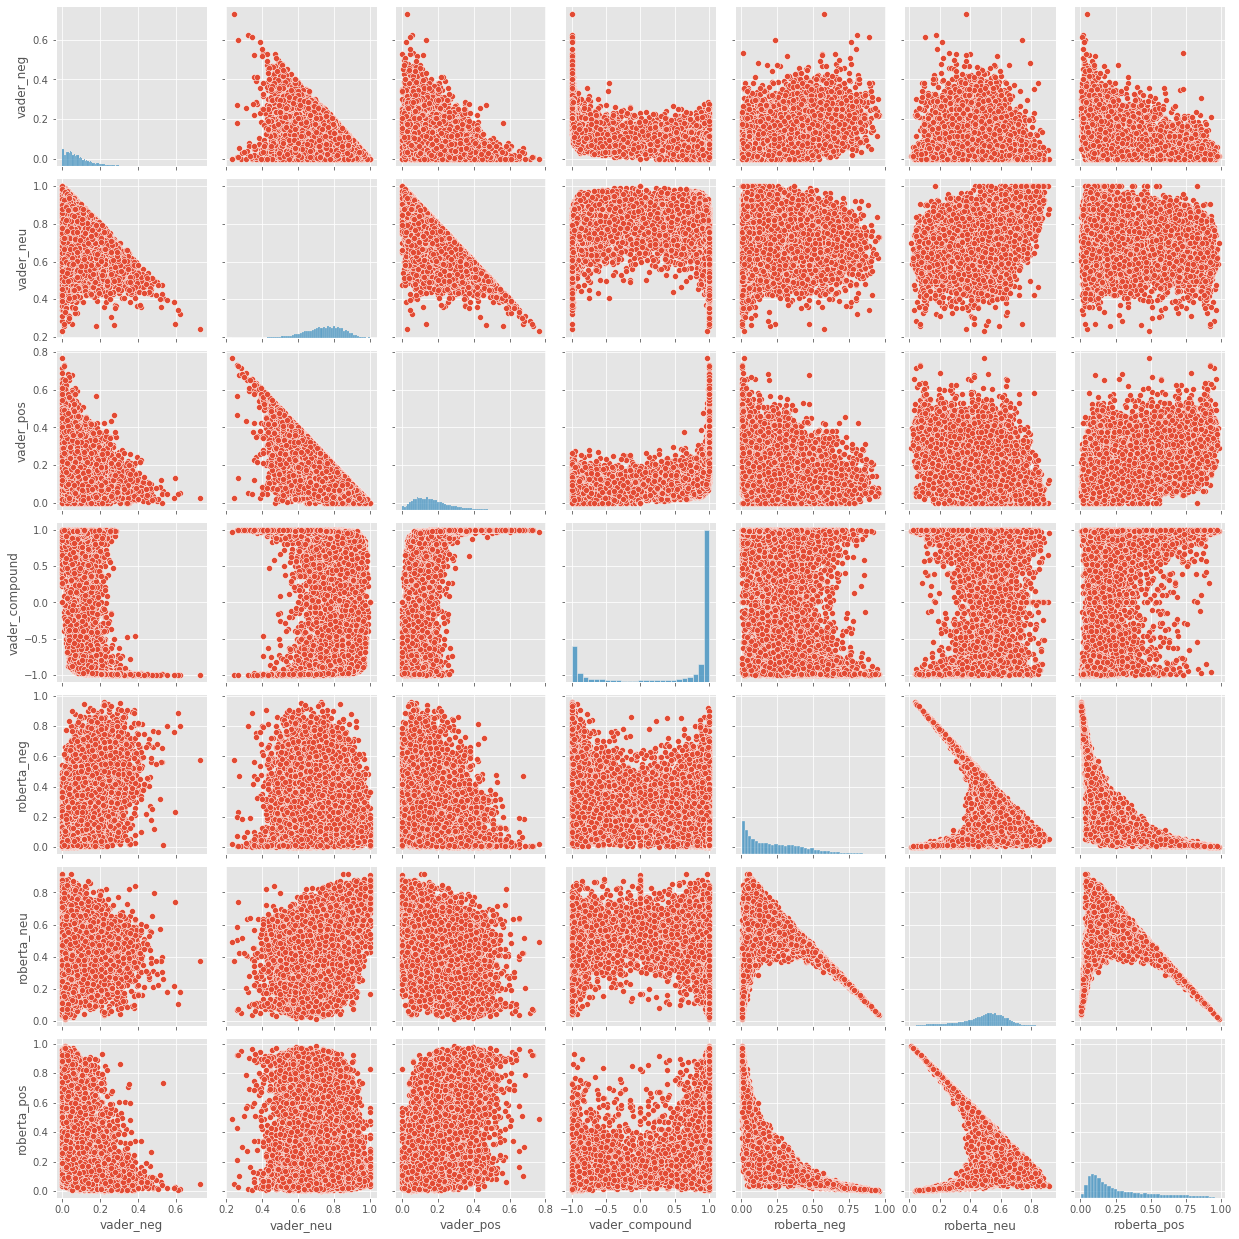

In [28]:
# compare scores between models

sns.pairplot(data=df_total, 
            vars = ['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
            palette='tab10')

plt.show()

In [29]:
series = df_total['chart_date']
df_total['chart_date'] = pd.to_datetime(series)

In [30]:
import datetime as dt

df_total['month'] = df_total['chart_date'].dt.month
df_total['year'] = df_total['chart_date'].dt.year

In [31]:
df_total.sort_values('chart_date', inplace = True)

### Adding Genres

In [32]:
df_genre = pd.read_csv("./data/artist_and_genres.csv")
df_genre.drop(columns=["Unnamed: 0"], inplace = True, axis=1)

In [33]:
df_genre.head()

,artist,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,The Four Preps,deep adult standards,doo-wop,vocal harmony group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Frankie Vaughan,deep adult standards,merseybeat,rock-and-roll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chuck Berry,blues rock,classic rock,rock,rock-and-roll,rockabilly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Ames Brothers,adult standards,deep adult standards,vocal harmony group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,David Seville,novelty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_total = df_genre.merge(df_total, right_on = 'performer', left_on= 'artist') 

drop the genre columns with a high % of NaNs (<50%)

In [35]:
df_total.drop(columns=['5','6','7','8','9','10','11','12','13','14'], inplace=True, axis=1)

In [36]:
from pprint import pprint
genre_0 = df_total['0'].value_counts().reset_index()
genre_1 = df_total['1'].value_counts().reset_index()
genre_2 = df_total['2'].value_counts().reset_index()
genre_3 = df_total['3'].value_counts().reset_index()
genre_4 = df_total['4'].value_counts().reset_index()
print(pd.DataFrame(genre_0).head(50))



                    index     0
0         adult standards  2980
1              album rock  1785
2    contemporary country  1121
3            classic soul   912
4           bubblegum pop   597
5               dance pop   511
6                   disco   268
7        contemporary r&b   251
8       alternative metal   248
9            classic rock   231
10                    pop   229
11                country   213
12       alternative rock   170
13           chicago soul   155
14    classic country pop   151
15                   funk   148
16               art rock   143
17             blues rock   129
18       british invasion   121
19                doo-wop   121
20            mellow gold   119
21             neo mellow   116
22               boy band   115
23             beatlesque   113
24                  blues   104
25              glee club   102
26   deep adult standards   100
27       arkansas country   100
28     classic girl group    95
29           canadian pop    95
30      

In [37]:
df_total.head()

,artist,0,1,2,3,4,song_id,vader_neg,vader_neu,vader_pos,...,song,performer,time_on_chart,consecutive_weeks,worst_position,chart_debut,lyrics,num_lyrics,month,year
0,The Four Preps,deep adult standards,doo-wop,vocal harmony group,NaN,NaN,Big ManThe Four Preps,0.076,0.816,0.107,...,Big Man,The Four Preps,1,NaN,67,1958-08-02,Big Man LyricsI was a big man yesterday but bo...,197,8,1958
1,The Four Preps,deep adult standards,doo-wop,vocal harmony group,NaN,NaN,Lazy Summer NightThe Four Preps,0.128,0.685,0.187,...,Lazy Summer Night,The Four Preps,10,9.0,82,1958-08-16,Lazy Summer Night LyricsIts such a lazy summer...,125,10,1958
2,The Four Preps,deep adult standards,doo-wop,vocal harmony group,NaN,NaN,I Ain't NeverThe Four Preps,0.089,0.594,0.317,...,I Ain't Never,The Four Preps,2,NaN,100,1959-09-12,I Ain’t Never LyricsWelllllllllll I aint never...,160,9,1959
3,The Four Preps,deep adult standards,doo-wop,vocal harmony group,NaN,NaN,Down By The StationThe Four Preps,0.025,0.735,0.239,...,Down By The Station,The Four Preps,15,14.0,98,1959-12-26,Down By The Station LyricsDown by the station ...,277,4,1960
4,The Four Preps,deep adult standards,doo-wop,vocal harmony group,NaN,NaN,Got A GirlThe Four Preps,0.044,0.767,0.189,...,Got A Girl,The Four Preps,10,9.0,100,1960-04-16,Got A Girl LyricsWell I got a girl what a girl...,225,6,1960


In [38]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 16859
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   artist             16860 non-null  object        
 1   0                  15836 non-null  object        
 2   1                  14048 non-null  object        
 3   2                  12250 non-null  object        
 4   3                  9647 non-null   object        
 5   4                  7454 non-null   object        
 6   song_id            16860 non-null  object        
 7   vader_neg          16860 non-null  float64       
 8   vader_neu          16860 non-null  float64       
 9   vader_pos          16860 non-null  float64       
 10  vader_compound     16860 non-null  float64       
 11  roberta_neg        16860 non-null  float64       
 12  roberta_neu        16860 non-null  float64       
 13  roberta_pos        16860 non-null  float64       
 14  chart_

In [39]:
from pathlib import Path
filepath2 = Path("./data/final_df.csv")
df_total.to_csv(filepath2)

In [40]:
df_total.to_excel("df_final.xlsx") 

<AxesSubplot:xlabel='year', ylabel='Count'>

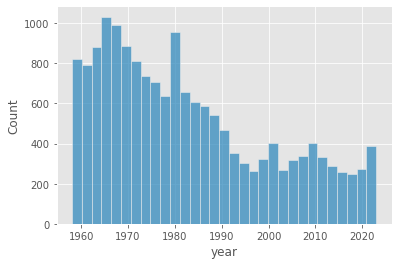

In [41]:
sns.histplot(data = df_total, x = 'year')

There are substantially fewer entries from the 1990s onwards. This may not be true. it could be that there songs tend to stay on the chart for longer in the later years. EDA may need to be conducted on the initial data set. There may be environmental factors or there may be issues with the lyric API and modelling which cause this issue.

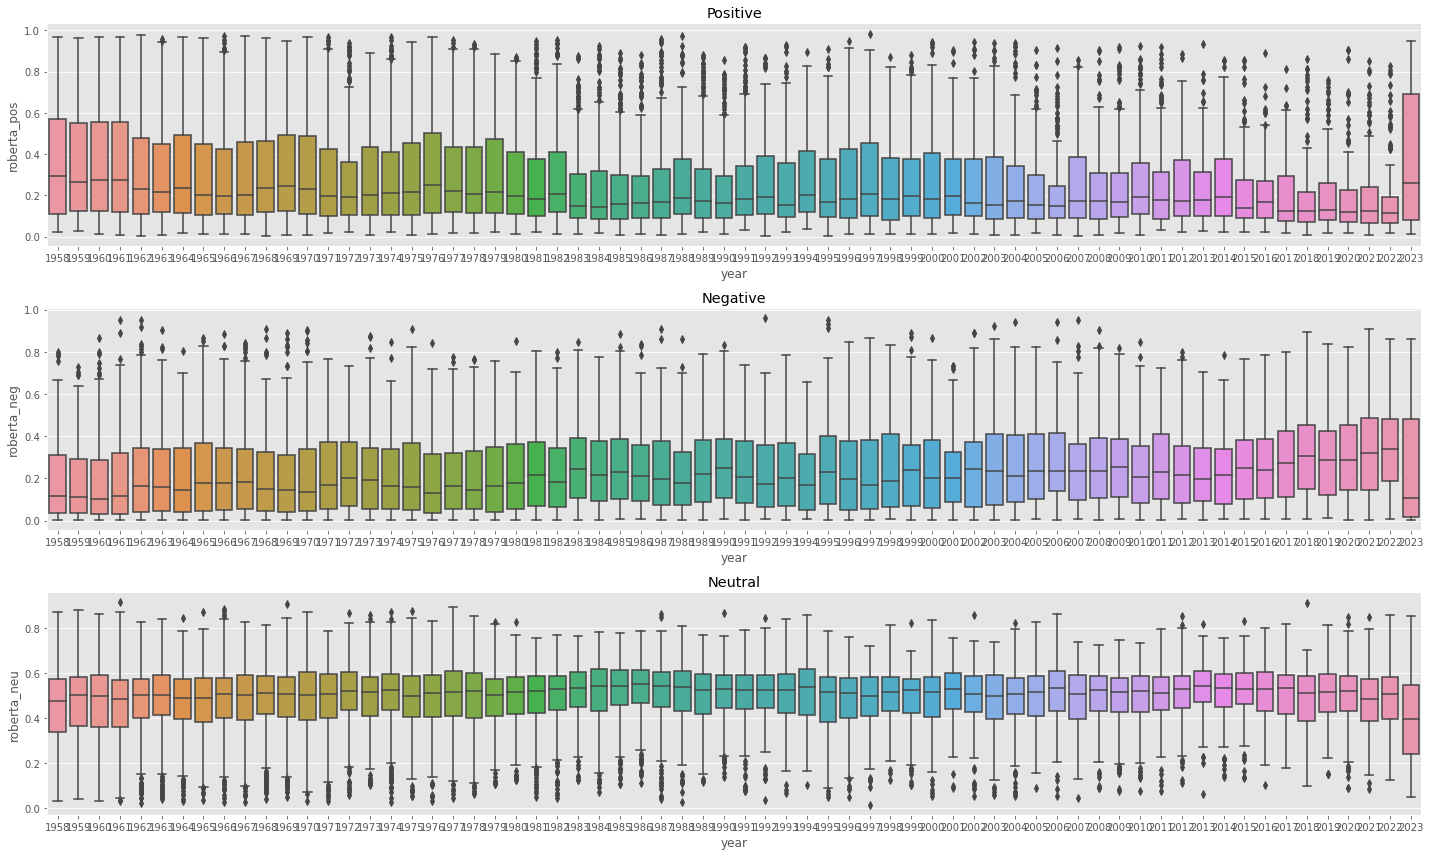

In [42]:
fig, axs = plt.subplots(3, 1, figsize=(20, 12))
sns.boxplot(data= c, x = 'year', y = 'roberta_pos', ax=axs[0])
sns.boxplot(data= df_total, x = 'year', y = 'roberta_neg', ax=axs[1])
sns.boxplot(data= df_total, x = 'year', y = 'roberta_neu', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout()
plt.show()


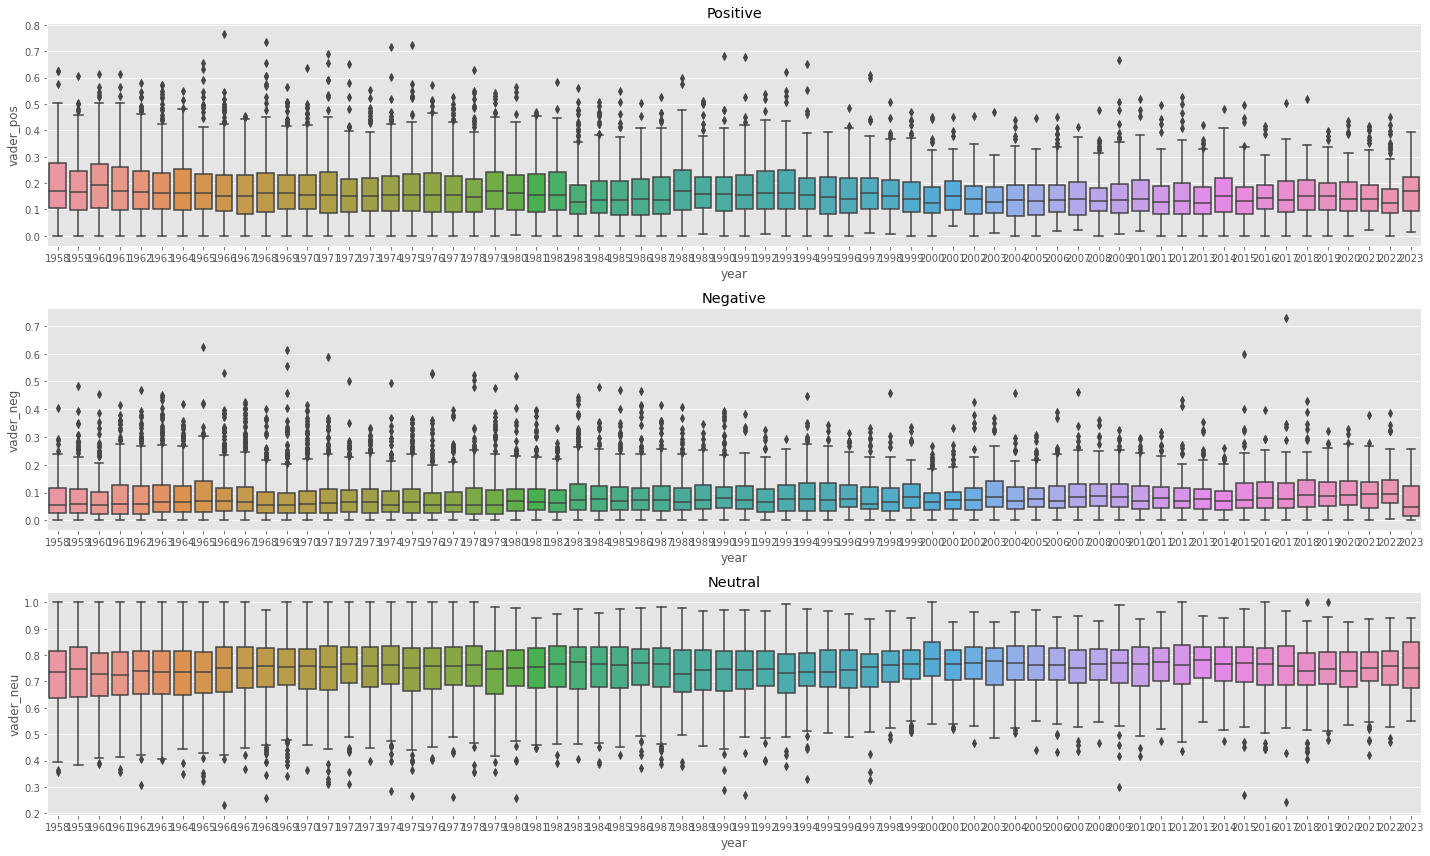

In [43]:
fig, axs = plt.subplots(3, 1, figsize=(20, 12))
sns.boxplot(data= df_total, x = 'year', y = 'vader_pos', ax=axs[0])
sns.boxplot(data= df_total, x = 'year', y = 'vader_neg', ax=axs[1])
sns.boxplot(data= df_total, x = 'year', y = 'vader_neu', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout()
plt.show()

In [53]:
# split into decades

df_1960s = df_total[df_total['year'].between(1960, 1969)]
df_1970s = df_total[df_total['year'].between(1970, 1979)] 
df_1980s = df_total[df_total['year'].between(1980, 1989)] 
df_1990s = df_total[df_total['year'].between(1990, 1999)] 
df_2000s = df_total[df_total['year'].between(2000, 2009)] 
df_2010s = df_total[df_total['year'].between(2010, 2019)] 
df_2020s = df_total[df_total['year'].between(2020, 2023)] 


In [67]:
df_1960s_samp = df_1960s.head(1000)
df_1970s_samp = df_1970s.head(1000)
df_1980s_samp = df_1980s.head(1000)
df_1990s_samp = df_1990s.head(1000)
df_2000s_samp = df_2000s.head(1000)
df_2010s_samp = df_2010s.head(1000)
df_2020s_samp = df_2020s.head(500)

In [57]:
from statsmodels.stats.weightstats import ztest as ztest

In [68]:
x60 = df_1960s_samp['roberta_neg']
x70 = df_1970s_samp['roberta_neg']
x80 = df_1980s_samp['roberta_neg']
x90 = df_1990s_samp['roberta_neg']
x00 = df_2000s_samp['roberta_neg']
x10 = df_2010s_samp['roberta_neg']
x20 = df_2020s_samp['roberta_neg']

In [69]:
print('60 v 70:', ztest(x60, x70, value=0))
print('70 v 80:', ztest(x70, x80, value=0))
print('80 v 90:', ztest(x80, x90, value=0))
print('90 v 00:', ztest(x90, x00, value=0))
print('00 v 10:', ztest(x00, x10, value=0))
print('10 v 20:', ztest(x10, x20, value=0))



60 v 70: (-2.708191966332309, 0.006765087940050754)
70 v 80: (-1.683201508880934, 0.09233608883452094)
80 v 90: (-2.1348547649323124, 0.03277287526257722)
90 v 00: (-1.4226892554470838, 0.15482625671554326)
00 v 10: (0.6518368255793352, 0.514506442508815)
10 v 20: (-6.5455836125292155, 5.92634894749986e-11)
